In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
df1 = pd.read_csv('NIFTY 50-12-09-2021-to-12-09-2022.csv')
df2 = pd.read_csv('NIFTY 50-12-09-2022-to-12-09-2023.csv')
df3 = pd.read_csv('NIFTY 50-12-09-2023-to-12-09-2024.csv')
df4 = pd.read_csv('NIFTY 50-12-09-2020-to-12-09-2021.csv')
df5 = pd.read_csv('NIFTY 50-12-09-2019-to-12-09-2020.csv')

In [144]:
combined_df = pd.concat([df5, df4, df1, df2, df3])

In [145]:
print("Column names:", combined_df.columns)

Column names: Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')


In [146]:
combined_df['difference'] = combined_df['Close '].diff()
combined_df['label'] = np.sign(combined_df['difference'])
combined_df['label'] = combined_df['label'].replace(0, np.nan).fillna(0).astype(int)
combined_df.drop(columns=['difference'], inplace=True)
combined_df.to_csv('labeled_dataset.csv', index=False)

In [147]:
df = pd.read_csv("labeled_dataset.csv")

In [148]:
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)', 'label'],
      dtype='object')

In [149]:
df.rename(columns={'Shares Traded ': 'Volume'}, inplace=True)

In [150]:
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Volume',
       'Turnover (₹ Cr)', 'label'],
      dtype='object')

In [151]:
print(len(df))


1245


In [152]:
df.dropna(subset=['Close ', 'Volume'], inplace=True)

# Initialize OBV
obv = [0]

if len(df) > 1:  # Ensure there are at least two rows to compare
    for i in range(1, len(df)):
        if df['Close '].iloc[i] > df['Close '].iloc[i - 1]:
            obv.append(obv[-1] + df['Volume'].iloc[i])
        elif df['Close '].iloc[i] < df['Close '].iloc[i - 1]:
            obv.append(obv[-1] - df['Volume'].iloc[i])
        else:
            obv.append(obv[-1])  # Handle the case where prices are the same
else:
    print("DataFrame does not have enough data to calculate OBV.")


# Assign OBV to DataFrame
df['OBV'] = obv

# Check the DataFrame to ensure OBV is calculated correctly
df


,Date,Open,High,Low,Close,Volume,Turnover (₹ Cr),label,OBV
0,12-SEP-2019,11058.30,11081.75,10964.95,10982.80,551436050.0,17510.17,0,0.000000e+00
1,13-SEP-2019,10986.80,11084.45,10945.75,11075.90,624305151.0,18012.76,1,6.243052e+08
2,16-SEP-2019,10994.85,11052.70,10968.20,11003.50,434449776.0,15786.17,-1,1.898554e+08
3,17-SEP-2019,11000.10,11000.10,10796.50,10817.60,482013044.0,17721.93,-1,-2.921577e+08
4,18-SEP-2019,10872.80,10885.15,10804.85,10840.65,519155072.0,16784.43,1,2.269974e+08
...,...,...,...,...,...,...,...,...,...
1240,06-SEP-2024,25093.70,25168.75,24801.30,24852.15,311671856.0,33001.17,-1,5.928993e+10
1241,09-SEP-2024,24823.40,24957.50,24753.15,24936.40,254367252.0,25180.28,1,5.954430e+10
1242,10-SEP-2024,24999.40,25130.50,24896.80,25041.10,251274802.0,27846.31,1,5.979557e+10
1243,11-SEP-2024,25034.00,25113.70,24885.15,24918.45,279229206.0,29395.73,-1,5.951634e+10


In [153]:
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Volume',
       'Turnover (₹ Cr)', 'label', 'OBV'],
      dtype='object')

In [154]:
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover (₹ Cr),label,OBV
1240,06-SEP-2024,25093.70,25168.75,24801.30,24852.15,311671856.0,33001.17,-1,5.928993e+10
1241,09-SEP-2024,24823.40,24957.50,24753.15,24936.40,254367252.0,25180.28,1,5.954430e+10
1242,10-SEP-2024,24999.40,25130.50,24896.80,25041.10,251274802.0,27846.31,1,5.979557e+10
1243,11-SEP-2024,25034.00,25113.70,24885.15,24918.45,279229206.0,29395.73,-1,5.951634e+10
1244,12-SEP-2024,25059.65,25433.35,24941.45,25388.90,380069653.0,41747.91,1,5.989641e+10


/var/folders/gr/r6lv2rfs2ns5ssmhztrt_gc80000gn/T/ipykernel_1053/1302913185.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date '] = pd.to_datetime(df['Date '])


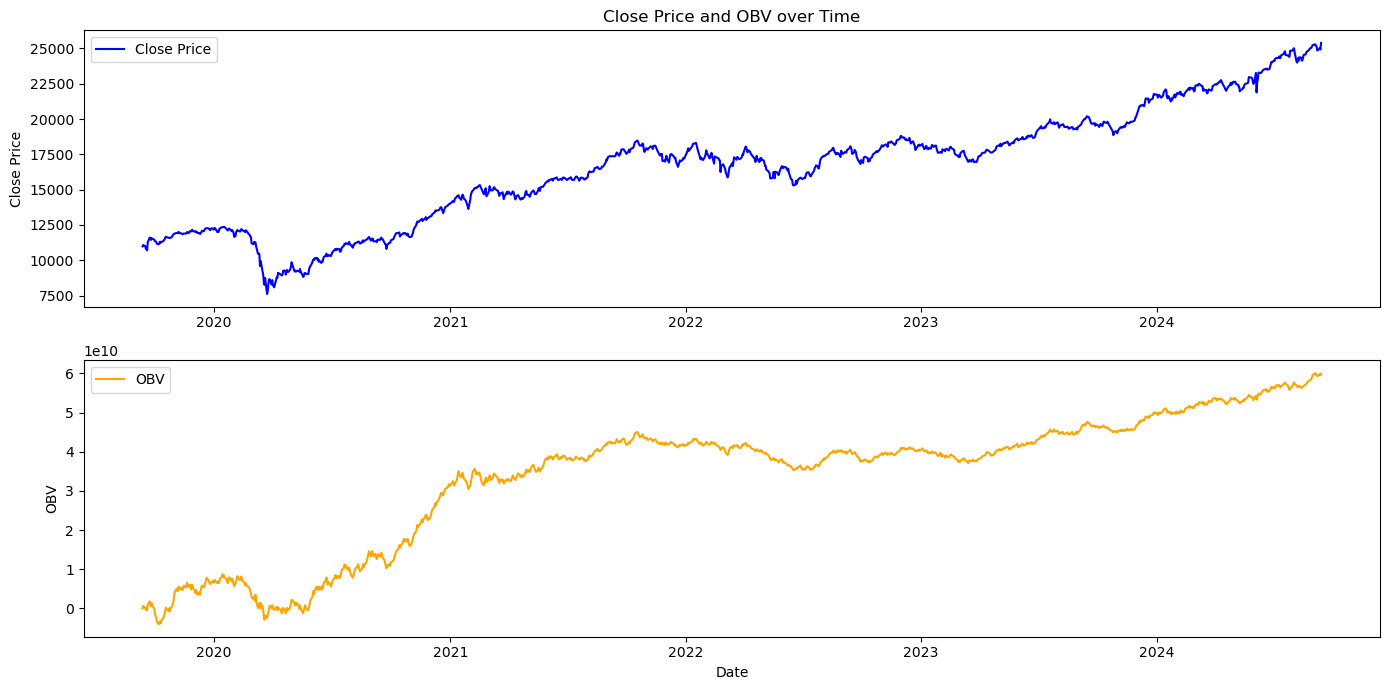

In [155]:
df['Date '] = pd.to_datetime(df['Date '])

# Plotting OBV and Close price against Date
plt.figure(figsize=(14, 7))

# Plot Close price
plt.subplot(2, 1, 1)
plt.plot(df['Date '], df['Close '], label='Close Price', color='blue')
plt.title('Close Price and OBV over Time')
plt.ylabel('Close Price')
plt.legend()

# Plot OBV
plt.subplot(2, 1, 2)
plt.plot(df['Date '], df['OBV'], label='OBV', color='orange')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.legend()

plt.tight_layout()
plt.show()

In [156]:
correlation = df['Close '].corr(df['OBV'])
print(f'Correlation: {correlation}')

Correlation: 0.9430804352006079


In [157]:
correlation_matrix = df.corr()
print(correlation_matrix)

                    Date      Open      High       Low     Close     Volume  \
Date             1.000000  0.946196  0.946833  0.945903  0.946302 -0.666037   
Open             0.946196  1.000000  0.999770  0.999630  0.999412 -0.665484   
High             0.946833  0.999770  1.000000  0.999548  0.999720 -0.662703   
Low              0.945903  0.999630  0.999548  1.000000  0.999732 -0.670765   
Close            0.946302  0.999412  0.999720  0.999732  1.000000 -0.666605   
Volume          -0.666037 -0.665484 -0.662703 -0.670765 -0.666605  1.000000   
Turnover (₹ Cr) -0.025720 -0.025641 -0.021197 -0.033579 -0.026911  0.573878   
label            0.021714  0.015289  0.022368  0.027325  0.035507 -0.017160   
OBV              0.895729  0.942753  0.943185  0.942435  0.943080 -0.712773   

                 Turnover (₹ Cr)     label       OBV  
Date                   -0.025720  0.021714  0.895729  
Open                   -0.025641  0.015289  0.942753  
High                   -0.021197  0.022368  

In [158]:
df['Close_roc'] = df['Close '].pct_change()
df['obv_roc'] = df['OBV'].pct_change()
df.tail(50)

,Date,Open,High,Low,Close,Volume,Turnover (₹ Cr),label,OBV,Close_roc,obv_roc
1195,2024-07-03,24291.75,24309.15,24207.10,24286.50,289201551.0,36661.17,1,5.647217e+10,0.006742,0.005147
1196,2024-07-04,24369.95,24401.00,24281.00,24302.15,251189844.0,28466.60,1,5.672336e+10,0.000644,0.004448
1197,2024-07-05,24213.35,24363.00,24168.85,24323.85,298381204.0,32052.48,1,5.702174e+10,0.000893,0.005260
1198,2024-07-08,24329.45,24344.60,24240.55,24320.55,266299131.0,26356.03,-1,5.675544e+10,-0.000136,-0.004670
1199,2024-07-09,24351.00,24443.60,24331.90,24433.20,250537091.0,29361.08,1,5.700598e+10,0.004632,0.004414
1200,2024-07-10,24459.85,24461.05,24141.80,24324.45,292263786.0,35358.54,-1,5.671372e+10,-0.004451,-0.005127
1201,2024-07-11,24396.55,24402.65,24193.75,24315.95,306404194.0,32115.44,-1,5.640731e+10,-0.000349,-0.005403
1202,2024-07-12,24387.95,24592.20,24331.15,24502.15,325823474.0,39565.33,1,5.673314e+10,0.007658,0.005776
1203,2024-07-15,24587.60,24635.05,24522.75,24586.70,305395934.0,31593.04,1,5.703853e+10,0.003451,0.005383
1204,2024-07-16,24615.90,24661.25,24587.65,24613.00,283212233.0,28668.71,1,5.732174e+10,0.001070,0.004965


       Date      Open      High       Low     Close        Volume  \
0 2019-09-12  11058.30  11081.75  10964.95  10982.80  551436050.0   
1 2019-09-13  10986.80  11084.45  10945.75  11075.90  624305151.0   
2 2019-09-16  10994.85  11052.70  10968.20  11003.50  434449776.0   
3 2019-09-17  11000.10  11000.10  10796.50  10817.60  482013044.0   
4 2019-09-18  10872.80  10885.15  10804.85  10840.65  519155072.0   

   Turnover (₹ Cr)  label          OBV  Close_roc   obv_roc  Divergence  \
0         17510.17      0          0.0        NaN       NaN         NaN   
1         18012.76      1  624305151.0   0.008477       inf         inf   
2         15786.17     -1  189855375.0  -0.006537 -0.695893   -0.689357   
3         17721.93     -1 -292157669.0  -0.016895 -2.538843   -2.521949   
4         16784.43      1  226997403.0   0.002131 -1.776969   -1.779100   

   Close_norm  obv_norm  
0    0.189697  0.062480  
1    0.194933  0.072222  
2    0.190861  0.065443  
3    0.180405  0.057921  
4   

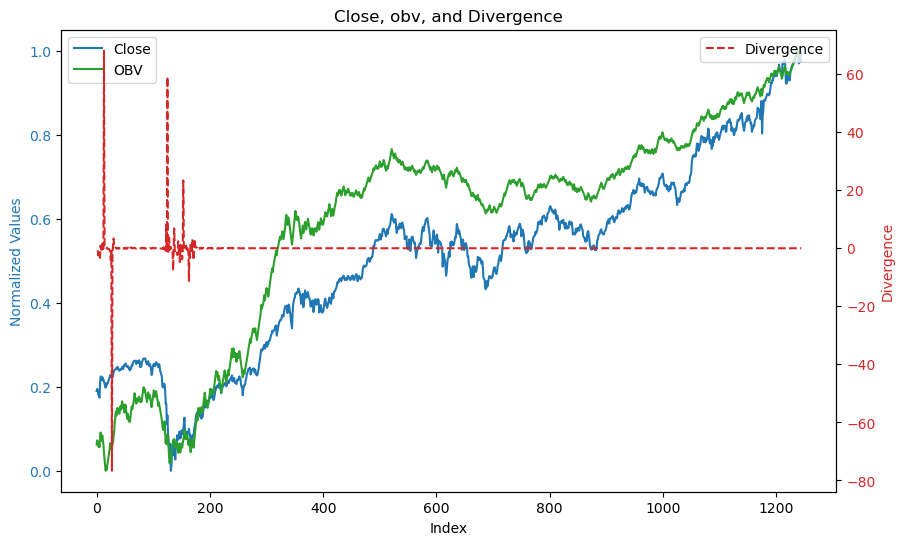

In [163]:
df['Divergence'] = df['obv_roc'] - df['Close_roc']

# Print the first few rows to inspect the data
print(df.head())

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Normalize the data for better comparison
df['Close_norm'] = (df['Close '] - df['Close '].min()) / (df['Close '].max() - df['Close '].min())
df['obv_norm'] = (df['OBV'] - df['OBV'].min()) / (df['OBV'].max() - df['OBV'].min())

# Plot Close and obv on the primary y-axis
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values', color='tab:blue')
ax1.plot(df.index, df['Close_norm'], label='Close', color='tab:blue')
ax1.plot(df.index, df['obv_norm'], label='OBV', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the Divergence
ax2 = ax1.twinx()
ax2.set_ylabel('Divergence', color='tab:red')
ax2.plot(df.index, df['Divergence'], label='Divergence', color='tab:red', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Add a title and show the plot
plt.title('Close, obv, and Divergence')
plt.show()

In [160]:
import seaborn as sns

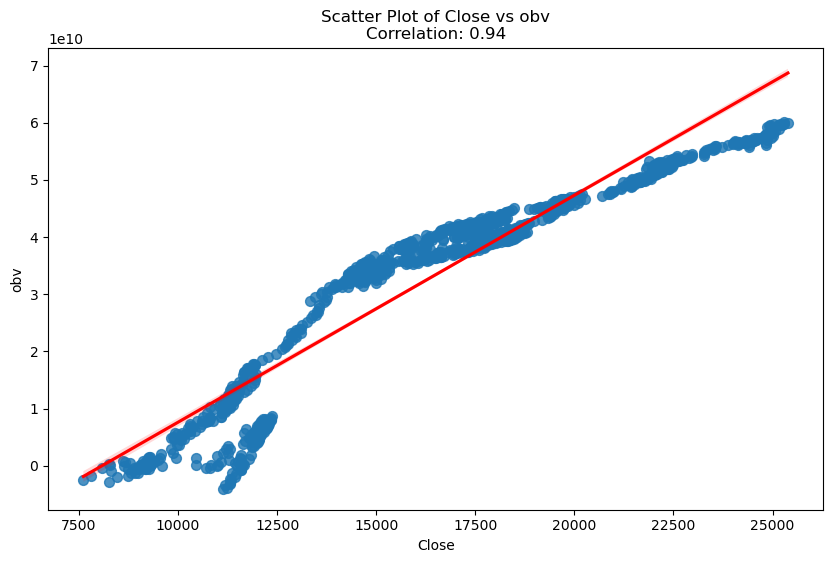

In [161]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Close ', y='OBV', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title(f'Scatter Plot of Close vs obv\nCorrelation: {correlation:.2f}')
plt.xlabel('Close')
plt.ylabel('obv')

plt.show()